In [1]:
# Вариант 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import math

In [2]:
n = [4, 6, 10, 12]
f = [i-1 for i in n]
p = 0.1 #0.05, 0.02, 0.01

In [3]:
sequences = [[9.577, 12.628, 11.003, 12.512], [12.718, 6.167, 9.919, 12.095, 5.811, 5.706], [12.016323622186091, 9.259246505609095, 17.345717938437094, 5.909356369978998, 13.68768256707768, 6.507839378250566, 13.61900518222573, 5.948196429498942, 12.475855480039662, 7.66352639971797], 
[11.896107580638313, 12.354328210962015, 5.35925979227144, 13.891229335546084, 10.170697806598511, 9.255832053277832, 16.561279953259266, 10.498005569850374, 9.716219531175344, 14.094420948209105, 9.558324283707853, 18.491552980442233]]

In [138]:
def M(seq):
    return sum(seq)/len(seq)

def D(seq):
    return (sum([x**2 for x in seq]) / len(seq) - M(seq) ** 2) * len(seq) / (len(seq)-1)

def S(seq):
    return D(seq) ** 0.5

'''def general_S(variances):
    summ = 0
    for i in range(len(n)):
        summ += (n[i] - 1)* variances[i]
    return math.sqrt(summ)/(sum(n) - len(variances))'''

'def general_S(variances):\n    summ = 0\n    for i in range(len(n)):\n        summ += (n[i] - 1)* variances[i]\n    return math.sqrt(summ)/(sum(n) - len(variances))'

In [94]:
def general_Ss(general):
    return (sum([(len(X)-1) * D(X) for X in general]) / (sum([len(X) for X in general]) - len(general)))**0.5

In [95]:
gen_S = general_Ss(sequences)

In [104]:
def grade_M_norm(x, p):
    return M(x) - sts.norm.ppf(1-p/2) * gen_S/math.sqrt(len(x)), M(x) + sts.norm.ppf(1-p/2) * gen_S/math.sqrt(len(x))

In [105]:
def grade_M_student(x, p):
    return M(x) - sts.t.ppf(1-p/2, len(x)-1) * S(x)/math.sqrt(len(x)), M(x) + sts.t.ppf(1-p/2, len(x)-1) * S(x)/math.sqrt(len(x))

In [106]:
def grade_M_chi(x, p):
    return (len(x)-1) * D(x)/(sts.chi2.ppf(1-p/2, len(x)-1)), (len(x)-1) * D(x)/(sts.chi2.ppf(p/2, len(x)-1))

## P = 0.01

In [107]:
gen_S

3.4764785647693404

In [108]:
Ms = []
Ds = []
Ss = []
gen_Ss = []

for seq in sequences:
    Ms.append(M(seq))
    Ds.append(D(seq))
    Ss.append(S(seq))
    gen_Ss.append(general_S(seq))

In [109]:
M_avg = sum(Ms)/len(Ms)
S_avg = math.sqrt((f[0] * Ss[0] ** 2 + f[1] * Ss[1] ** 2 + f[2] * Ss[2] ** 2 + f[3] * Ss[3] ** 2) / (sum(n) - 4)) 

In [110]:
for seq in sequences:
    print(f"Квантиль по нормальному: {sts.t.ppf(1-p/2, len(seq)-1)}")
    print(f"Квантиль по Стьюденту: {sts.norm.ppf(1-p/2)}")

Квантиль по нормальному: 2.3533634348018264
Квантиль по Стьюденту: 1.6448536269514722
Квантиль по нормальному: 2.0150483733330233
Квантиль по Стьюденту: 1.6448536269514722
Квантиль по нормальному: 1.8331129326536335
Квантиль по Стьюденту: 1.6448536269514722
Квантиль по нормальному: 1.7958848187036691
Квантиль по Стьюденту: 1.6448536269514722


In [135]:
norm_borders = []
t_borders = []
chi_borders_D = []
chi_borders_S = []

for seq in sequences:
    low, high = grade_M_norm(seq, p)
    norm_borders.append((low, high))
    print("-------------------------------------------------------")
    print(f"Длина выборки: {len(seq)}")
    print(f"Мат. ожидание: {M(seq)}")
    print(f"Дисперсия: {D(seq)}")
    print(f"Среднее кв. отклонение: {S(seq)}")
    print(f"Оценка мат. ожидания по Нормальному закону: {low} <= M <= {high}")
    
    low, high = grade_M_student(seq, p)
    t_borders.append((low, high))
    print(f"Оценка мат. ожидания по Стьюденту: {low} <= M <= {high}")

    low, high = grade_M_chi(seq, p)
    chi_borders_D.append((low, high))
    chi_borders_S.append((math.sqrt(low), math.sqrt(high)))
    print(f"Оценка дисперсии по Хи квадрат: {math.sqrt(low)} <= S <= {math.sqrt(high)}")

-------------------------------------------------------
Длина выборки: 4
Мат. ожидание: 11.43
Дисперсия: 2.0739553333333256
Среднее кв. отклонение: 1.4401233743444781
Оценка мат. ожидания по Нормальному закону: 8.570850811860051 <= M <= 14.289149188139948
Оценка мат. ожидания по Стьюденту: 9.73543315460714 <= M <= 13.12456684539286
Оценка дисперсии по Хи квадрат: 0.8922845972000036 <= S <= 4.205172557678905
-------------------------------------------------------
Длина выборки: 6
Мат. ожидание: 8.736
Дисперсия: 10.574995999999993
Среднее кв. отклонение: 3.2519218932809553
Оценка мат. ожидания по Нормальному закону: 6.4015144635214485 <= M <= 11.070485536478554
Оценка мат. ожидания по Стьюденту: 6.06083879935893 <= M <= 11.411161200641072
Оценка дисперсии по Хи квадрат: 2.185453322588908 <= S <= 6.794102084505867
-------------------------------------------------------
Длина выборки: 10
Мат. ожидание: 10.443274987302184
Дисперсия: 15.582195037050326
Среднее кв. отклонение: 3.9474289147558

In [112]:
for seq in sequences:
    print(f"Квантиль по Хи квадрат: {(sts.chi2.ppf(1-p/2, len(seq)-1))}, {(sts.chi2.ppf(p/2, len(seq)-1))}")

Квантиль по Хи квадрат: 7.814727903251179, 0.35184631774927144
Квантиль по Хи квадрат: 11.070497693516351, 1.1454762260617692
Квантиль по Хи квадрат: 16.918977604620448, 3.325112843066815
Квантиль по Хи квадрат: 19.67513757268249, 4.574813079322224


In [113]:
chi_borders_D = []
chi_borders_S = []

for seq in sequences:
    low, high = grade_M_chi(seq, p)
    chi_borders_D.append((low, high))
    chi_borders_S.append((math.sqrt(low), math.sqrt(high)))
    print("-------------------------------------------------------")
    print(f"Длина выборки: {len(seq)}")
    print(f"Мат. ожидание: {M(seq)}")
    print(f"Дисперсия: {D(seq)}")
    print(f"Среднее кв. отклонение: {S(seq)}")
    print(f"Оценка дисперсии по Хи квадрат: {math.sqrt(low)} <= S <= {math.sqrt(high)}")

-------------------------------------------------------
Длина выборки: 4
Мат. ожидание: 11.43
Дисперсия: 2.0739553333333256
Среднее кв. отклонение: 1.4401233743444781
Оценка дисперсии по Хи квадрат: 0.8922845972000036 <= S <= 4.205172557678905
-------------------------------------------------------
Длина выборки: 6
Мат. ожидание: 8.736
Дисперсия: 10.574995999999993
Среднее кв. отклонение: 3.2519218932809553
Оценка дисперсии по Хи квадрат: 2.185453322588908 <= S <= 6.794102084505867
-------------------------------------------------------
Длина выборки: 10
Мат. ожидание: 10.443274987302184
Дисперсия: 15.582195037050326
Среднее кв. отклонение: 3.9474289147558217
Оценка дисперсии по Хи квадрат: 2.879045410293109 <= S <= 6.494300475649893
-------------------------------------------------------
Длина выборки: 12
Мат. ожидание: 11.82060483716153
Дисперсия: 12.642608052996955
Среднее кв. отклонение: 3.555644534117121
Оценка дисперсии по Хи квадрат: 2.658617081692735 <= S <= 5.513507917923063


In [140]:
M_avg, S_avg

(10.60746995611593, 3.4764785647693404)

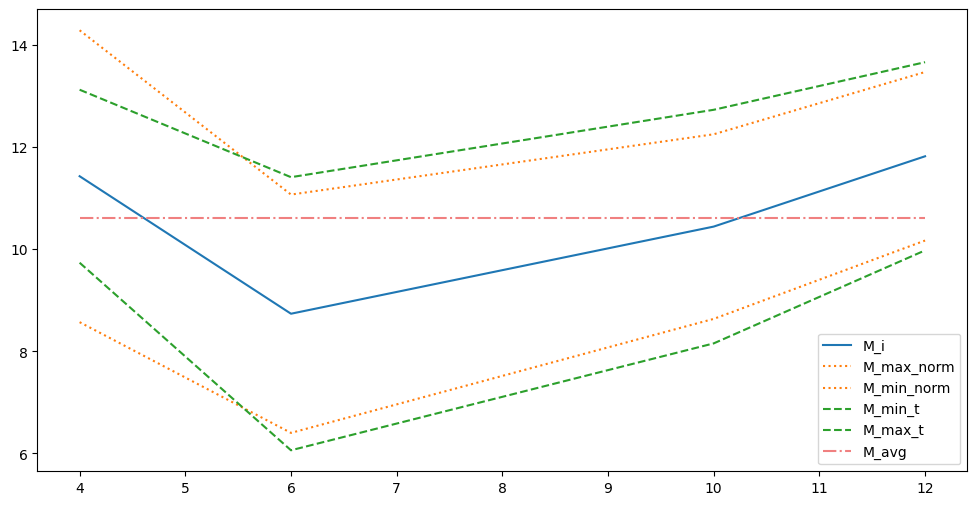

In [114]:
plt.figure(figsize=(12, 6))

plt.plot(n, Ms, linestyle='solid', label='M_i')
plt.plot(n, list([x[0] for x in norm_borders]), linestyle='dotted', color='tab:orange', label='M_max_norm')
plt.plot(n, list([x[1] for x in norm_borders]), linestyle='dotted', color='tab:orange', label='M_min_norm')

plt.plot(n, list([x[0] for x in t_borders]), linestyle='dashed', color='tab:green', label='M_min_t')
plt.plot(n, list([x[1] for x in t_borders]), linestyle='dashed', color='tab:green', label='M_max_t')

plt.plot(n, list(M_avg for _ in range(len(n))), linestyle='dashdot', label='M_avg', color='lightcoral')

plt.legend(loc='lower right')

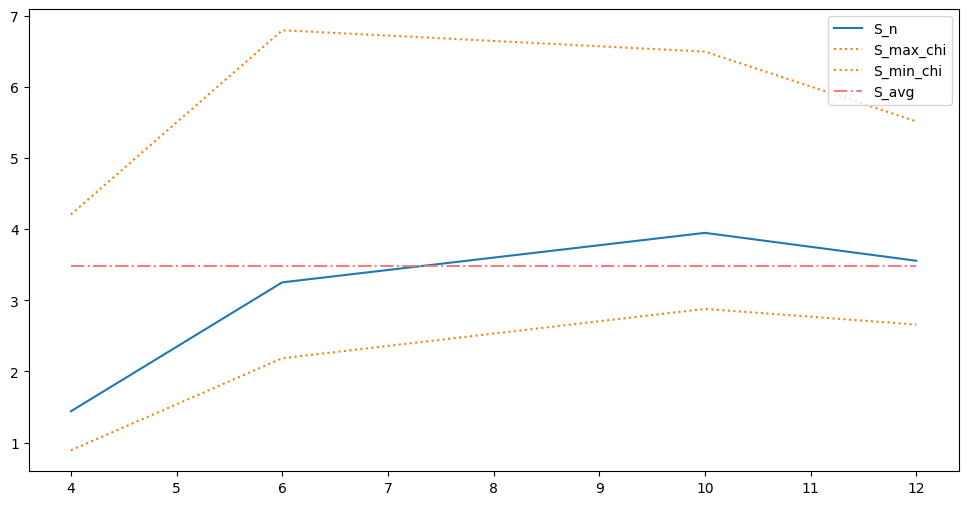

In [115]:
plt.figure(figsize=(12, 6))

plt.plot(n, Ss, linestyle='solid', label='S_n')
plt.plot(n, list([x[0] for x in chi_borders_S]), linestyle='dotted', color='tab:orange', label='S_max_chi')
plt.plot(n, list([x[1] for x in chi_borders_S]), linestyle='dotted', color='tab:orange', label='S_min_chi')

plt.plot(n, list(S_avg for _ in range(len(n))), linestyle='dashdot', label='S_avg', color='lightcoral')

plt.legend(loc='upper right')

## P = 0.05

In [116]:
for seq in sequences:
    print(f"Квантиль по нормальному: {sts.t.ppf(1-p/2, len(seq)-1)}")
    print(f"Квантиль по Стьюденту: {sts.norm.ppf(1-p/2)}")

Квантиль по нормальному: 2.3533634348018264
Квантиль по Стьюденту: 1.6448536269514722
Квантиль по нормальному: 2.0150483733330233
Квантиль по Стьюденту: 1.6448536269514722
Квантиль по нормальному: 1.8331129326536335
Квантиль по Стьюденту: 1.6448536269514722
Квантиль по нормальному: 1.7958848187036691
Квантиль по Стьюденту: 1.6448536269514722


In [117]:
norm_borders = []
t_borders = []

for seq in sequences:
    low, high = grade_M_norm(seq, p)
    norm_borders.append((low, high))
    print("-------------------------------------------------------")
    print(f"Длина выборки: {len(seq)}")
    print(f"Мат. ожидание: {M(seq)}")
    print(f"Дисперсия: {D(seq)}")
    print(f"Среднее кв. отклонение: {S(seq)}")
    print(f"Оценка мат. ожидания по Нормальному закону: {low} <= M <= {high}")
    
    low, high = grade_M_student(seq, p)
    t_borders.append((low, high))
    print(f"Оценка мат. ожидания по Стьюденту: {low} <= M <= {high}")

-------------------------------------------------------
Длина выборки: 4
Мат. ожидание: 11.43
Дисперсия: 2.0739553333333256
Среднее кв. отклонение: 1.4401233743444781
Оценка мат. ожидания по Нормальному закону: 8.570850811860051 <= M <= 14.289149188139948
Оценка мат. ожидания по Стьюденту: 9.73543315460714 <= M <= 13.12456684539286
-------------------------------------------------------
Длина выборки: 6
Мат. ожидание: 8.736
Дисперсия: 10.574995999999993
Среднее кв. отклонение: 3.2519218932809553
Оценка мат. ожидания по Нормальному закону: 6.4015144635214485 <= M <= 11.070485536478554
Оценка мат. ожидания по Стьюденту: 6.06083879935893 <= M <= 11.411161200641072
-------------------------------------------------------
Длина выборки: 10
Мат. ожидание: 10.443274987302184
Дисперсия: 15.582195037050326
Среднее кв. отклонение: 3.9474289147558217
Оценка мат. ожидания по Нормальному закону: 8.63499026635348 <= M <= 12.251559708250888
Оценка мат. ожидания по Стьюденту: 8.155024627280193 <= M <= 

In [118]:
for seq in sequences:
    print(f"Квантиль по Хи квадрат: {(sts.chi2.ppf(1-p/2, len(seq)-1))}, {(sts.chi2.ppf(p/2, len(seq)-1))}")

Квантиль по Хи квадрат: 7.814727903251179, 0.35184631774927144
Квантиль по Хи квадрат: 11.070497693516351, 1.1454762260617692
Квантиль по Хи квадрат: 16.918977604620448, 3.325112843066815
Квантиль по Хи квадрат: 19.67513757268249, 4.574813079322224


In [119]:
chi_borders_D = []
chi_borders_S = []

for seq in sequences:
    low, high = grade_M_chi(seq, p)
    chi_borders_D.append((low, high))
    chi_borders_S.append((math.sqrt(low), math.sqrt(high)))
    print("-------------------------------------------------------")
    print(f"Длина выборки: {len(seq)}")
    print(f"Мат. ожидание: {M(seq)}")
    print(f"Дисперсия: {D(seq)}")
    print(f"Среднее кв. отклонение: {S(seq)}")
    print(f"Оценка дисперсии по Хи квадрат: {math.sqrt(low)} <= S <= {math.sqrt(high)}")

-------------------------------------------------------
Длина выборки: 4
Мат. ожидание: 11.43
Дисперсия: 2.0739553333333256
Среднее кв. отклонение: 1.4401233743444781
Оценка дисперсии по Хи квадрат: 0.8922845972000036 <= S <= 4.205172557678905
-------------------------------------------------------
Длина выборки: 6
Мат. ожидание: 8.736
Дисперсия: 10.574995999999993
Среднее кв. отклонение: 3.2519218932809553
Оценка дисперсии по Хи квадрат: 2.185453322588908 <= S <= 6.794102084505867
-------------------------------------------------------
Длина выборки: 10
Мат. ожидание: 10.443274987302184
Дисперсия: 15.582195037050326
Среднее кв. отклонение: 3.9474289147558217
Оценка дисперсии по Хи квадрат: 2.879045410293109 <= S <= 6.494300475649893
-------------------------------------------------------
Длина выборки: 12
Мат. ожидание: 11.82060483716153
Дисперсия: 12.642608052996955
Среднее кв. отклонение: 3.555644534117121
Оценка дисперсии по Хи квадрат: 2.658617081692735 <= S <= 5.513507917923063


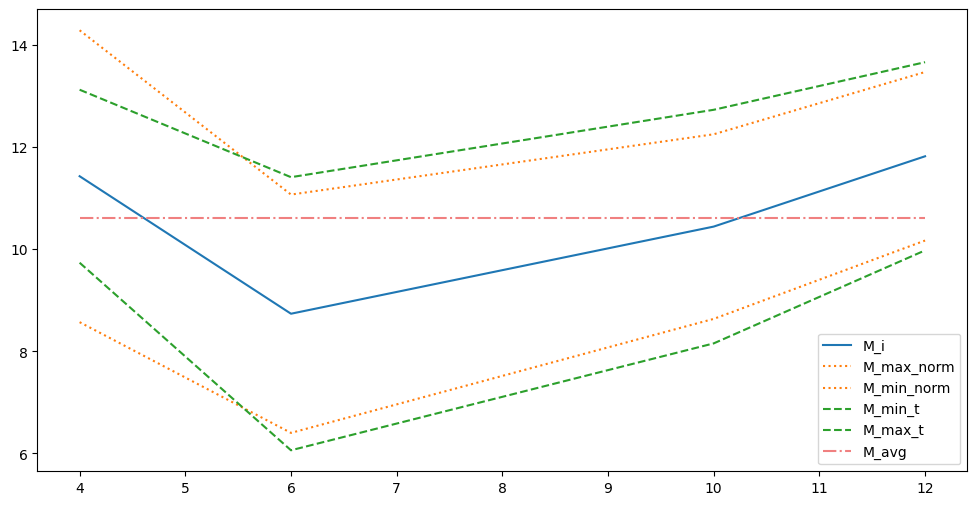

In [120]:
plt.figure(figsize=(12, 6))

plt.plot(n, Ms, linestyle='solid', label='M_i')
plt.plot(n, list([x[0] for x in norm_borders]), linestyle='dotted', color='tab:orange', label='M_max_norm')
plt.plot(n, list([x[1] for x in norm_borders]), linestyle='dotted', color='tab:orange', label='M_min_norm')

plt.plot(n, list([x[0] for x in t_borders]), linestyle='dashed', color='tab:green', label='M_min_t')
plt.plot(n, list([x[1] for x in t_borders]), linestyle='dashed', color='tab:green', label='M_max_t')

plt.plot(n, list(M_avg for _ in range(len(n))), linestyle='dashdot', label='M_avg', color='lightcoral')

plt.legend(loc='lower right')

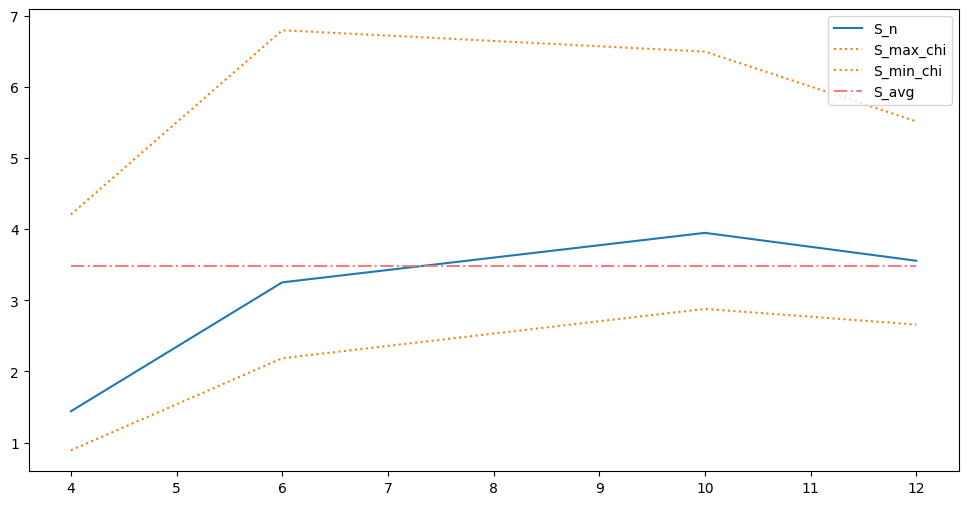

In [121]:
plt.figure(figsize=(12, 6))

plt.plot(n, Ss, linestyle='solid', label='S_n')
plt.plot(n, list([x[0] for x in chi_borders_S]), linestyle='dotted', color='tab:orange', label='S_max_chi')
plt.plot(n, list([x[1] for x in chi_borders_S]), linestyle='dotted', color='tab:orange', label='S_min_chi')

plt.plot(n, list(S_avg for _ in range(len(n))), linestyle='dashdot', label='S_avg', color='lightcoral')

plt.legend(loc='upper right')

## P = 0.02

In [122]:
for seq in sequences:
    print(f"Квантиль по нормальному: {sts.t.ppf(1-p/2, len(seq)-1)}")
    print(f"Квантиль по Стьюденту: {sts.norm.ppf(1-p/2)}")

Квантиль по нормальному: 2.3533634348018264
Квантиль по Стьюденту: 1.6448536269514722
Квантиль по нормальному: 2.0150483733330233
Квантиль по Стьюденту: 1.6448536269514722
Квантиль по нормальному: 1.8331129326536335
Квантиль по Стьюденту: 1.6448536269514722
Квантиль по нормальному: 1.7958848187036691
Квантиль по Стьюденту: 1.6448536269514722


In [123]:
norm_borders = []
t_borders = []

for seq in sequences:
    low, high = grade_M_norm(seq, p)
    norm_borders.append((low, high))
    print("-------------------------------------------------------")
    print(f"Длина выборки: {len(seq)}")
    print(f"Мат. ожидание: {M(seq)}")
    print(f"Дисперсия: {D(seq)}")
    print(f"Среднее кв. отклонение: {S(seq)}")
    print(f"Оценка мат. ожидания по Нормальному закону: {low} <= M <= {high}")
    
    low, high = grade_M_student(seq, p)
    t_borders.append((low, high))
    print(f"Оценка мат. ожидания по Стьюденту: {low} <= M <= {high}")

-------------------------------------------------------
Длина выборки: 4
Мат. ожидание: 11.43
Дисперсия: 2.0739553333333256
Среднее кв. отклонение: 1.4401233743444781
Оценка мат. ожидания по Нормальному закону: 8.570850811860051 <= M <= 14.289149188139948
Оценка мат. ожидания по Стьюденту: 9.73543315460714 <= M <= 13.12456684539286
-------------------------------------------------------
Длина выборки: 6
Мат. ожидание: 8.736
Дисперсия: 10.574995999999993
Среднее кв. отклонение: 3.2519218932809553
Оценка мат. ожидания по Нормальному закону: 6.4015144635214485 <= M <= 11.070485536478554
Оценка мат. ожидания по Стьюденту: 6.06083879935893 <= M <= 11.411161200641072
-------------------------------------------------------
Длина выборки: 10
Мат. ожидание: 10.443274987302184
Дисперсия: 15.582195037050326
Среднее кв. отклонение: 3.9474289147558217
Оценка мат. ожидания по Нормальному закону: 8.63499026635348 <= M <= 12.251559708250888
Оценка мат. ожидания по Стьюденту: 8.155024627280193 <= M <= 

In [124]:
for seq in sequences:
    print(f"Квантиль по Хи квадрат: {(sts.chi2.ppf(1-p/2, len(seq)-1))}, {(sts.chi2.ppf(p/2, len(seq)-1))}")

Квантиль по Хи квадрат: 7.814727903251179, 0.35184631774927144
Квантиль по Хи квадрат: 11.070497693516351, 1.1454762260617692
Квантиль по Хи квадрат: 16.918977604620448, 3.325112843066815
Квантиль по Хи квадрат: 19.67513757268249, 4.574813079322224


In [125]:
chi_borders_D = []
chi_borders_S = []

for seq in sequences:
    low, high = grade_M_chi(seq, p)
    chi_borders_D.append((low, high))
    chi_borders_S.append((math.sqrt(low), math.sqrt(high)))
    print("-------------------------------------------------------")
    print(f"Длина выборки: {len(seq)}")
    print(f"Мат. ожидание: {M(seq)}")
    print(f"Дисперсия: {D(seq)}")
    print(f"Среднее кв. отклонение: {S(seq)}")
    print(f"Оценка дисперсии по Хи квадрат: {math.sqrt(low)} <= S <= {math.sqrt(high)}")

-------------------------------------------------------
Длина выборки: 4
Мат. ожидание: 11.43
Дисперсия: 2.0739553333333256
Среднее кв. отклонение: 1.4401233743444781
Оценка дисперсии по Хи квадрат: 0.8922845972000036 <= S <= 4.205172557678905
-------------------------------------------------------
Длина выборки: 6
Мат. ожидание: 8.736
Дисперсия: 10.574995999999993
Среднее кв. отклонение: 3.2519218932809553
Оценка дисперсии по Хи квадрат: 2.185453322588908 <= S <= 6.794102084505867
-------------------------------------------------------
Длина выборки: 10
Мат. ожидание: 10.443274987302184
Дисперсия: 15.582195037050326
Среднее кв. отклонение: 3.9474289147558217
Оценка дисперсии по Хи квадрат: 2.879045410293109 <= S <= 6.494300475649893
-------------------------------------------------------
Длина выборки: 12
Мат. ожидание: 11.82060483716153
Дисперсия: 12.642608052996955
Среднее кв. отклонение: 3.555644534117121
Оценка дисперсии по Хи квадрат: 2.658617081692735 <= S <= 5.513507917923063


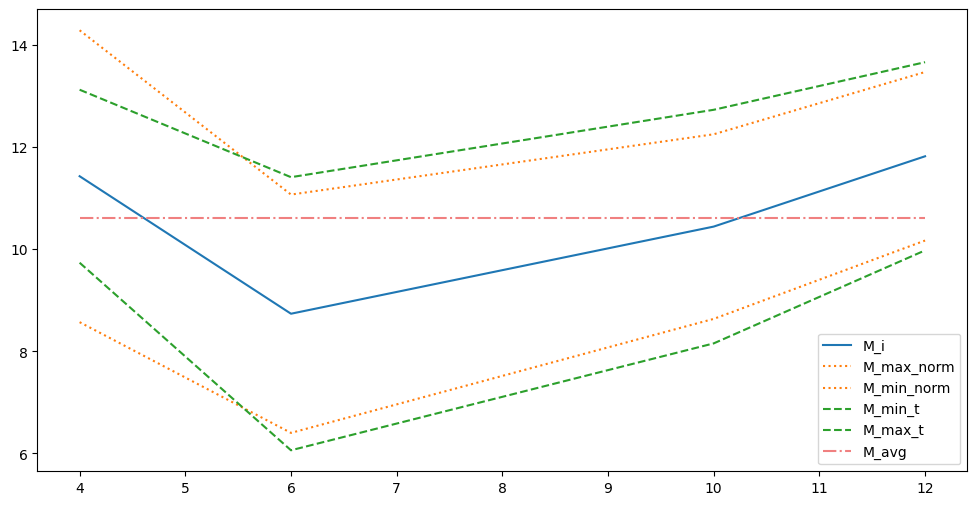

In [126]:
plt.figure(figsize=(12, 6))

plt.plot(n, Ms, linestyle='solid', label='M_i')
plt.plot(n, list([x[0] for x in norm_borders]), linestyle='dotted', color='tab:orange', label='M_max_norm')
plt.plot(n, list([x[1] for x in norm_borders]), linestyle='dotted', color='tab:orange', label='M_min_norm')

plt.plot(n, list([x[0] for x in t_borders]), linestyle='dashed', color='tab:green', label='M_min_t')
plt.plot(n, list([x[1] for x in t_borders]), linestyle='dashed', color='tab:green', label='M_max_t')

plt.plot(n, list(M_avg for _ in range(len(n))), linestyle='dashdot', label='M_avg', color='lightcoral')

plt.legend(loc='lower right')

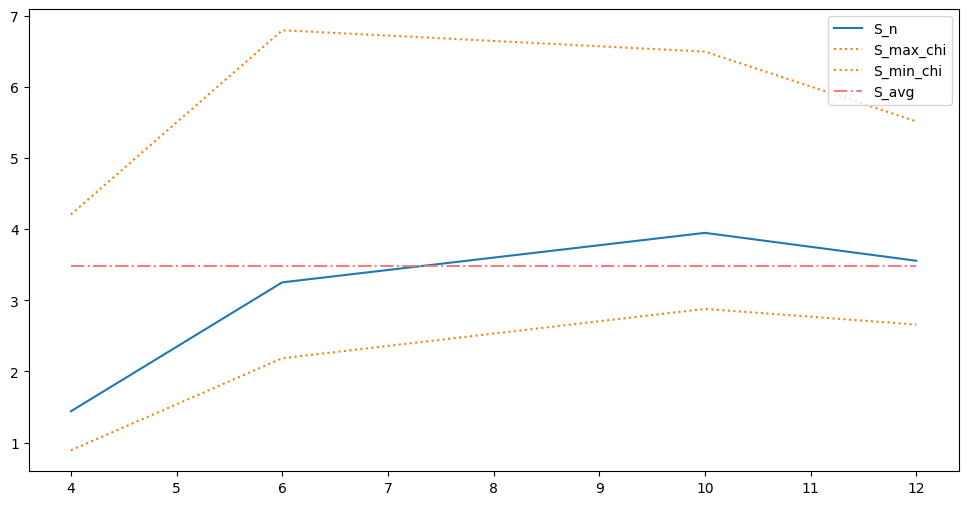

In [127]:
plt.figure(figsize=(12, 6))

plt.plot(n, Ss, linestyle='solid', label='S_n')
plt.plot(n, list([x[0] for x in chi_borders_S]), linestyle='dotted', color='tab:orange', label='S_max_chi')
plt.plot(n, list([x[1] for x in chi_borders_S]), linestyle='dotted', color='tab:orange', label='S_min_chi')

plt.plot(n, list(S_avg for _ in range(len(n))), linestyle='dashdot', label='S_avg', color='lightcoral')

plt.legend(loc='upper right')

## P = 0.01

In [128]:
for seq in sequences:
    print(f"Квантиль по нормальному: {sts.t.ppf(1-p/2, len(seq)-1)}")
    print(f"Квантиль по Стьюденту: {sts.norm.ppf(1-p/2)}")

Квантиль по нормальному: 2.3533634348018264
Квантиль по Стьюденту: 1.6448536269514722
Квантиль по нормальному: 2.0150483733330233
Квантиль по Стьюденту: 1.6448536269514722
Квантиль по нормальному: 1.8331129326536335
Квантиль по Стьюденту: 1.6448536269514722
Квантиль по нормальному: 1.7958848187036691
Квантиль по Стьюденту: 1.6448536269514722


In [129]:
norm_borders = []
t_borders = []

for seq in sequences:
    low, high = grade_M_norm(seq, p)
    norm_borders.append((low, high))
    print("-------------------------------------------------------")
    print(f"Длина выборки: {len(seq)}")
    print(f"Мат. ожидание: {M(seq)}")
    print(f"Дисперсия: {D(seq)}")
    print(f"Среднее кв. отклонение: {S(seq)}")
    print(f"Оценка мат. ожидания по Нормальному закону: {low} <= M <= {high}")
    
    low, high = grade_M_student(seq, p)
    t_borders.append((low, high))
    print(f"Оценка мат. ожидания по Стьюденту: {low} <= M <= {high}")

-------------------------------------------------------
Длина выборки: 4
Мат. ожидание: 11.43
Дисперсия: 2.0739553333333256
Среднее кв. отклонение: 1.4401233743444781
Оценка мат. ожидания по Нормальному закону: 8.570850811860051 <= M <= 14.289149188139948
Оценка мат. ожидания по Стьюденту: 9.73543315460714 <= M <= 13.12456684539286
-------------------------------------------------------
Длина выборки: 6
Мат. ожидание: 8.736
Дисперсия: 10.574995999999993
Среднее кв. отклонение: 3.2519218932809553
Оценка мат. ожидания по Нормальному закону: 6.4015144635214485 <= M <= 11.070485536478554
Оценка мат. ожидания по Стьюденту: 6.06083879935893 <= M <= 11.411161200641072
-------------------------------------------------------
Длина выборки: 10
Мат. ожидание: 10.443274987302184
Дисперсия: 15.582195037050326
Среднее кв. отклонение: 3.9474289147558217
Оценка мат. ожидания по Нормальному закону: 8.63499026635348 <= M <= 12.251559708250888
Оценка мат. ожидания по Стьюденту: 8.155024627280193 <= M <= 

In [130]:
for seq in sequences:
    print(f"Квантиль по Хи квадрат: {(sts.chi2.ppf(1-p/2, len(seq)-1))}, {(sts.chi2.ppf(p/2, len(seq)-1))}")

Квантиль по Хи квадрат: 7.814727903251179, 0.35184631774927144
Квантиль по Хи квадрат: 11.070497693516351, 1.1454762260617692
Квантиль по Хи квадрат: 16.918977604620448, 3.325112843066815
Квантиль по Хи квадрат: 19.67513757268249, 4.574813079322224


In [131]:
chi_borders_D = []
chi_borders_S = []

for seq in sequences:
    low, high = grade_M_chi(seq, p)
    chi_borders_D.append((low, high))
    chi_borders_S.append((math.sqrt(low), math.sqrt(high)))
    print("-------------------------------------------------------")
    print(f"Длина выборки: {len(seq)}")
    print(f"Мат. ожидание: {M(seq)}")
    print(f"Дисперсия: {D(seq)}")
    print(f"Среднее кв. отклонение: {S(seq)}")
    print(f"Оценка дисперсии по Хи квадрат: {math.sqrt(low)} <= S <= {math.sqrt(high)}")

-------------------------------------------------------
Длина выборки: 4
Мат. ожидание: 11.43
Дисперсия: 2.0739553333333256
Среднее кв. отклонение: 1.4401233743444781
Оценка дисперсии по Хи квадрат: 0.8922845972000036 <= S <= 4.205172557678905
-------------------------------------------------------
Длина выборки: 6
Мат. ожидание: 8.736
Дисперсия: 10.574995999999993
Среднее кв. отклонение: 3.2519218932809553
Оценка дисперсии по Хи квадрат: 2.185453322588908 <= S <= 6.794102084505867
-------------------------------------------------------
Длина выборки: 10
Мат. ожидание: 10.443274987302184
Дисперсия: 15.582195037050326
Среднее кв. отклонение: 3.9474289147558217
Оценка дисперсии по Хи квадрат: 2.879045410293109 <= S <= 6.494300475649893
-------------------------------------------------------
Длина выборки: 12
Мат. ожидание: 11.82060483716153
Дисперсия: 12.642608052996955
Среднее кв. отклонение: 3.555644534117121
Оценка дисперсии по Хи квадрат: 2.658617081692735 <= S <= 5.513507917923063


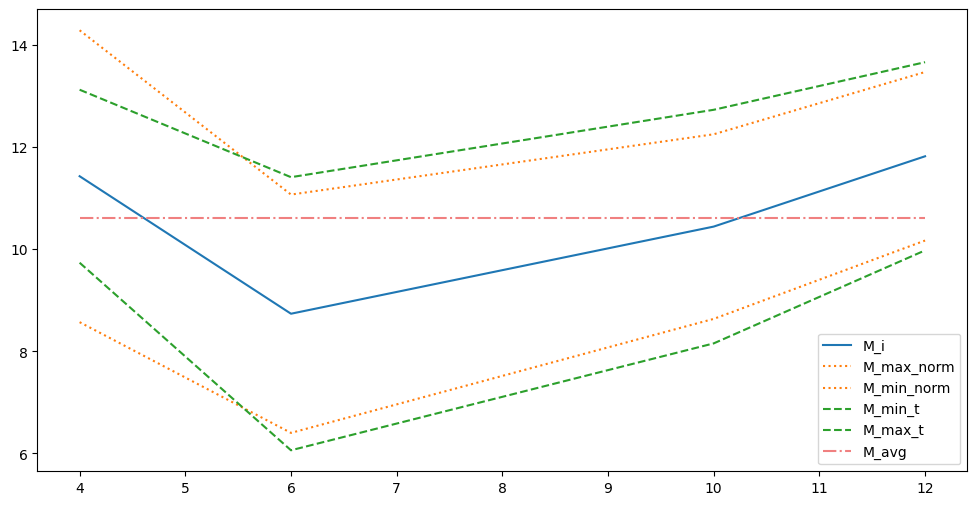

In [132]:
plt.figure(figsize=(12, 6))

plt.plot(n, Ms, linestyle='solid', label='M_i')
plt.plot(n, list([x[0] for x in norm_borders]), linestyle='dotted', color='tab:orange', label='M_max_norm')
plt.plot(n, list([x[1] for x in norm_borders]), linestyle='dotted', color='tab:orange', label='M_min_norm')

plt.plot(n, list([x[0] for x in t_borders]), linestyle='dashed', color='tab:green', label='M_min_t')
plt.plot(n, list([x[1] for x in t_borders]), linestyle='dashed', color='tab:green', label='M_max_t')

plt.plot(n, list(M_avg for _ in range(len(n))), linestyle='dashdot', label='M_avg', color='lightcoral')

plt.legend(loc='lower right')

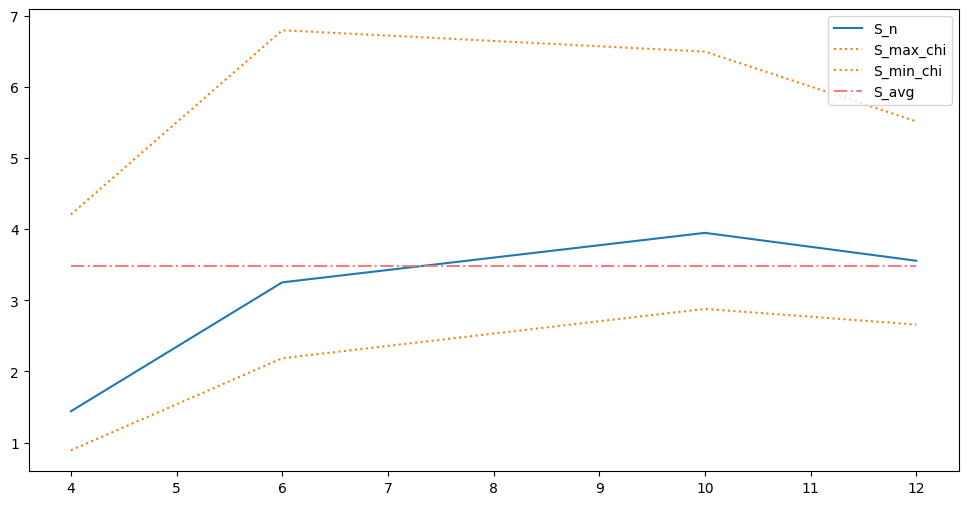

In [133]:
plt.figure(figsize=(12, 6))

plt.plot(n, Ss, linestyle='solid', label='S_n')
plt.plot(n, list([x[0] for x in chi_borders_S]), linestyle='dotted', color='tab:orange', label='S_max_chi')
plt.plot(n, list([x[1] for x in chi_borders_S]), linestyle='dotted', color='tab:orange', label='S_min_chi')

plt.plot(n, list(S_avg for _ in range(len(n))), linestyle='dashdot', label='S_avg', color='lightcoral')

plt.legend(loc='upper right')